In [2]:
import pandas as pd

# 주가지수

In [3]:
df_13 = pd.read_excel('../Finance_data/20210913.xlsx', index_col=0)
df_14 = pd.read_excel('../Finance_data/20210914.xlsx', index_col=0)

In [4]:
df_13.head()

,종목명,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수
종목코드,,,,,,,,,,,
095570,AJ네트웍스,5830,-130,-2.18,5980,5980,5800,133188,780734220,272973979850,46822295
006840,AK홀딩스,27150,0,0.00,27000,27200,26250,21725,581595350,359671281150,13247561
027410,BGF,6250,-70,-1.11,6270,6350,6230,105306,661320960,598229943750,95716791
282330,BGF리테일,179000,-2000,-1.10,183000,183500,177500,23213,4178520500,3093819174000,17283906
138930,BNK금융지주,7970,50,0.63,7920,7970,7890,839034,6661342020,2597703910620,325935246


In [8]:
print(len(df_13))
print(len(df_14))

923
924


In [10]:
df_13 = df_13[df_13['시가'] != 0]
df_14 = df_14[df_14['시가'] != 0]

## difference 메소드

In [11]:
idx = df_14.index.difference(df_13.index)
print(idx)
print(df_14.loc[idx[0], '종목명'])

Index(['395400'], dtype='object', name='종목코드')
SK리츠


## 지수의 증감률 계산

In [12]:
전일비교시가총액 = df_13['시가총액'].sum()
전일기준시가총액 = df_13['시가총액'].sum()
증감률 = (전일비교시가총액 + df_14.loc[idx[0], '시가총액']) / 전일비교시가총액
당일기준시가총액 = 증감률 * 전일기준시가총액
당일비교시가총액 = df_14['시가총액'].sum()
print(당일비교시가총액 / 당일기준시가총액)

1.0067170373639553


## 주식 수가 변한 종목이 있는지 확인

In [ ]:
intersect_idx = df_14.index.intersection(df_13.index)
t_13 = df_13.loc[intersect_idx]
t_14 = df_14.loc[intersect_idx]
cond = t_13['상장주식수'] != t_14['상장주식수']
print(cond.all())   # False: 변한 종목이 있다

False


In [14]:
t_14.loc[cond, '상장주식수'] - t_13.loc[cond, '상장주식수']

종목코드
001570    499996
011930      5661
Name: 상장주식수, dtype: int64

## 주식수 증가로 인한 시가총액

In [15]:
주식수증가액 = (t_14.loc[cond, '상장주식수'] - t_13.loc[cond, '상장주식수']) * t_13.loc[cond, '종가']

전일비교시가총액 = df_13['시가총액'].sum()
전일기준시가총액 = df_13['시가총액'].sum()
증감률 = (전일비교시가총액 + df_14.loc[idx[0], '시가총액'] + 주식수증가액.sum()) / 전일비교시가총액
당일기준시가총액 = 증감률 * 전일기준시가총액
당일비교시가총액 = df_14['시가총액'].sum()
print(당일비교시가총액 / 당일기준시가총액)

1.0067159326297976


# 코스피와 삼성전자

In [16]:
import pandas as pd
df = pd.read_excel('../Finance_data/20210914.xlsx', index_col=0)
df = df[['종목명', '종가', '시가총액']]
df.head()

,종목명,종가,시가총액
종목코드,,,
095570,AJ네트웍스,6000,280933770000
006840,AK홀딩스,27700,366957439700
027410,BGF,6260,599187111660
282330,BGF리테일,179000,3093819174000
138930,BNK금융지주,8070,2630297435220


In [17]:
df = pd.read_excel('../Finance_data/20210914.xlsx', index_col=0, usecols=[0, 1, 2, 10])
df.head()

,종목명,종가,시가총액
종목코드,,,
095570,AJ네트웍스,6000,280933770000
006840,AK홀딩스,27700,366957439700
027410,BGF,6260,599187111660
282330,BGF리테일,179000,3093819174000
138930,BNK금융지주,8070,2630297435220


In [18]:
df['비중'] = df['시가총액'] / df['시가총액'].sum() * 100
df.sort_values('시가총액', ascending=False).head()

,종목명,종가,시가총액,비중
종목코드,,,,
005930,삼성전자,76600,457285343330000,20.054103
000660,SK하이닉스,107500,78260254237500,3.432078
035420,NAVER,402500,66116016487500,2.899497
207940,삼성바이오로직스,913000,60408645000000,2.649202
005935,삼성전자우,71400,58754110380000,2.576643


In [19]:
import numpy as np

kospi = pd.read_excel("../Finance_data/kospi.xlsx")
samsung = pd.read_excel("../Finance_data/samsung.xlsx")

data = [ kospi['종가'], samsung['종가'] ]
df = pd.concat(data, axis=1, keys=["kospi", "samsung"])
df.head()

/opt/anaconda3/envs/financee/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/opt/anaconda3/envs/financee/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,kospi,samsung
0,3199.27,76700
1,3144.19,74600
2,3133.90,74300
3,3128.53,74600
4,3146.81,75700


<Axes: xlabel='samsung', ylabel='kospi'>

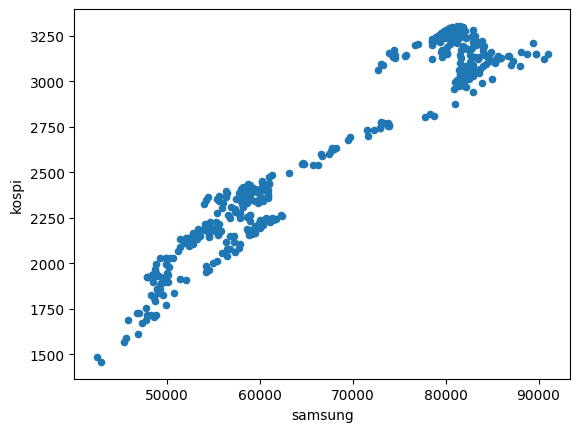

In [20]:
df.plot.scatter(x='samsung', y='kospi')

In [21]:
df.corr()

,kospi,samsung
kospi,1.000000,0.966597
samsung,0.966597,1.000000


# 코스피 통계

In [23]:
kospi = pd.read_excel("../Finance_data/kospi.xlsx", index_col=0, parse_dates=True)
kospi.head()

/opt/anaconda3/envs/financee/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,종가,대비,등락률,시가,고가,저가,거래량,거래대금,상장시가총액
일자,,,,,,,,,
2021-08-31,3199.27,55.08,1.75,3144.49,3199.89,3130.30,661221,15863630,2309062613
2021-08-30,3144.19,10.29,0.33,3160.87,3164.87,3132.77,602858,11758710,2269580866
2021-08-27,3133.90,5.37,0.17,3116.29,3143.01,3106.97,520669,11039934,2262422712
2021-08-26,3128.53,-18.28,-0.58,3151.30,3159.37,3121.04,727719,13335288,2259280094
2021-08-25,3146.81,8.51,0.27,3148.13,3161.00,3124.25,624688,13365596,2272311235


In [24]:
print(kospi['종가'].max())
print(kospi['종가'].min())

3305.21
1457.64


In [25]:
cond = kospi['종가'] == kospi['종가'].max()
kospi.loc[cond]

,종가,대비,등락률,시가,고가,저가,거래량,거래대금,상장시가총액
일자,,,,,,,,,
2021-07-06,3305.21,12.0,0.36,3295.44,3313.51,3295.44,1029465,14686383,2314417370


In [26]:
print(kospi['종가'].idxmax())
print(kospi['종가'].idxmin())

2021-07-06 00:00:00
2020-03-19 00:00:00


In [28]:
kospi = pd.read_excel("../Finance_data/kospi.xlsx", index_col=0, usecols=[0, 1])
kospi["변동폭"] = kospi["종가"] - kospi["종가"].shift(1)
kospi.sort_values('변동폭').iloc[:5]

/opt/anaconda3/envs/financee/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,종가,변동폭
일자,,
2020/03/23,1482.46,-127.51
2021/01/07,3031.68,-120.50
2020/03/19,1457.64,-108.51
2020/06/15,2030.82,-107.23
2021/02/24,2994.98,-104.71


In [29]:
kospi.sort_values('변동폭', ascending=False).iloc[:5]

,종가,변동폭
일자,,
2020/03/18,1591.20,133.56
2020/06/12,2132.30,101.48
2021/01/28,3069.05,92.84
2021/02/25,3099.69,86.74
2020/08/19,2360.54,86.32


In [30]:
print(kospi["변동폭"].nlargest(n=5))
print(kospi["변동폭"].nsmallest(n=5))

일자
2020/03/18    133.56
2020/06/12    101.48
2021/01/28     92.84
2021/02/25     86.74
2020/08/19     86.32
Name: 변동폭, dtype: float64
일자
2020/03/23   -127.51
2021/01/07   -120.50
2020/03/19   -108.51
2020/06/15   -107.23
2021/02/24   -104.71
Name: 변동폭, dtype: float64


## Grouper, agg 메소드

In [31]:
kospi = pd.read_excel("../Finance_data/kospi.xlsx", usecols=[0, 1, 4, 5, 6, 7], parse_dates=[0])
how = {
    '시가' : 'first',
    '고가' : max,
    '저가' : min,
    '종가' : 'last',
    '거래량' : sum
}
df = kospi.groupby( pd.Grouper(key='일자', freq='m') ).agg(how)
df.head()

/opt/anaconda3/envs/financee/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/var/folders/56/wpml5l_5587_ysq3klw611180000gn/T/ipykernel_37681/3669842501.py:9: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = kospi.groupby( pd.Grouper(key='일자', freq='m') ).agg(how)
/var/folders/56/wpml5l_5587_ysq3klw611180000gn/T/ipykernel_37681/3669842501.py:9: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df = kospi.groupby( pd.Grouper(key='일자', freq='m') ).agg(how)
/var/folders/56/wpml5l_5587_ysq3klw611180000gn/T/ipykernel_37681/3669842501.py:9: FutureWarning: The provided callable <built-in function mi

,시가,고가,저가,종가,거래량
일자,,,,,
2020-01-31,2201.21,2277.23,2119.01,2119.01,13096068
2020-02-29,2086.61,2255.49,1980.82,1987.01,13959766
2020-03-31,1997.03,2089.08,1439.43,1754.64,17091025
2020-04-30,1737.28,1957.51,1664.13,1947.56,21045123
2020-05-31,1906.42,2054.52,1894.29,2029.60,16206497


In [33]:
kospi = pd.read_excel("../Finance_data/kospi.xlsx", usecols=[0, 1], index_col=0, parse_dates=True)
kospi = kospi.sort_index()

threshold = 2300
cond = kospi['종가'] >= threshold
print(kospi.loc[cond, '종가'].iloc[0])
print(kospi.loc[cond, '종가'].index[0])

2311.86
2020-08-05 00:00:00


/opt/anaconda3/envs/financee/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [34]:
for threshold in range(2300, 3100, 100):
    cond = kospi['종가'] >= threshold
    print(threshold, kospi.loc[cond, '종가'].iloc[0], kospi.loc[cond, '종가'].index[0])

2300 2311.86 2020-08-05 00:00:00
2400 2418.67 2020-08-11 00:00:00
2500 2543.03 2020-11-16 00:00:00
2600 2602.59 2020-11-23 00:00:00
2700 2731.45 2020-12-04 00:00:00
2800 2806.86 2020-12-24 00:00:00
2900 2944.45 2021-01-04 00:00:00
3000 3031.68 2021-01-07 00:00:00


In [35]:
data = [ ]
for threshold in range(2300, 3100, 100):
    cond = kospi['종가'] > threshold
    data.append( (f'{threshold} 포인트 돌파', kospi.index[cond][0], kospi.loc[cond, '종가'].iloc[0]) )

df = pd.DataFrame(data, columns=['이벤트', '일자', '지수'])
df

,이벤트,일자,지수
0,2300 포인트 돌파,2020-08-05,2311.86
1,2400 포인트 돌파,2020-08-11,2418.67
2,2500 포인트 돌파,2020-11-16,2543.03
3,2600 포인트 돌파,2020-11-23,2602.59
4,2700 포인트 돌파,2020-12-04,2731.45
5,2800 포인트 돌파,2020-12-24,2806.86
6,2900 포인트 돌파,2021-01-04,2944.45
7,3000 포인트 돌파,2021-01-07,3031.68


# 시장수익률

In [36]:
kospi = pd.read_excel("../Finance_data/kospi.xlsx", usecols=[0, 1], index_col=0, parse_dates=True)
kospi = kospi.sort_index()
수익률 = kospi.iloc[-1, 0]/kospi.iloc[0, 0]
print( (수익률 - 1) * 100 )

47.081377547502036


/opt/anaconda3/envs/financee/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


## 연복리수익률

In [37]:
diff = (kospi.index[-1] - kospi.index[0])
투자기간 = diff.days / 365
cagr = 수익률 ** (1/투자기간) -1
print(cagr * 100)

26.111719470122587


## 삼전 연평균수익률

In [39]:
ss = pd.read_excel("../Finance_data/samsung.xlsx", usecols=[0, 1], index_col=0, parse_dates=True)
ss = ss.sort_index()
수익률 = ss.iloc[-1, 0]/ss.iloc[0, 0]
diff = (ss.index[-1] - ss.index[0])
투자기간 = diff.days / 365
cagr = 수익률 ** (1/투자기간) -1
print(cagr * 100)

21.871470174981077


/opt/anaconda3/envs/financee/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


## 코스피 지수 VS 삼전

<Axes: >

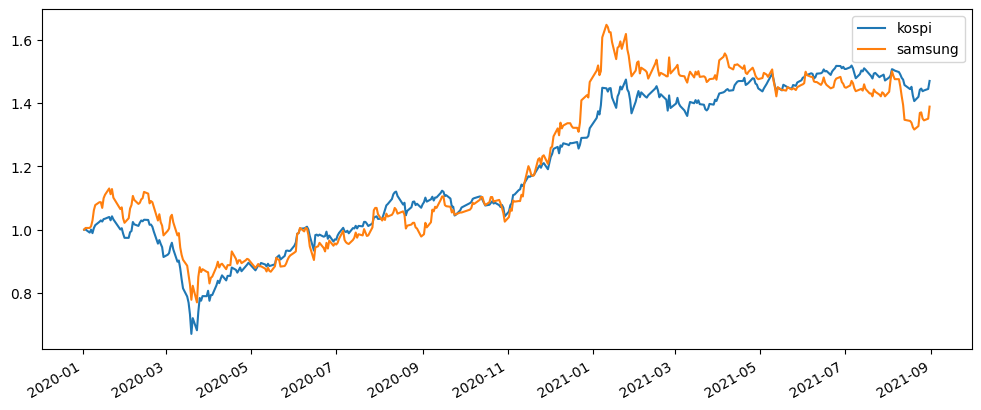

In [40]:
kospi_return = kospi['종가']/kospi.iloc[0, 0]
ss_return = ss['종가']/ss.iloc[0, 0]

df = pd.concat([kospi_return, ss_return], axis=1, keys=["kospi", "samsung"])
df.index.name = ''
df.plot(figsize=(12, 5))

# MDD(Maximum Drawdown)

In [41]:
kospi = pd.read_excel("../Finance_data/kospi2000.xlsx", index_col=0)
kospi['전고점'] = kospi['Close'].cummax()
kospi['DD'] = (1 - kospi['Close'] / kospi['전고점']) * 100
kospi.head()

,Close,Open,High,Low,Volume,Change,전고점,DD
Date,,,,,,,,
2000-01-04,1059.04,1028.33,1066.18,1016.59,195900000.0,0.0301,1059.04,0.000000
2000-01-05,986.31,1006.87,1026.52,984.05,257700000.0,-0.0687,1059.04,6.867540
2000-01-06,960.79,1013.95,1014.90,953.50,203520000.0,-0.0259,1059.04,9.277270
2000-01-07,948.65,949.17,970.16,930.84,215660000.0,-0.0126,1059.04,10.423591
2000-01-10,987.24,979.67,994.94,965.02,240180000.0,0.0407,1059.04,6.779725


In [43]:
MDD = kospi['DD'].max()
print(MDD)

55.73727149116181


In [44]:
조건 = kospi["DD"] == MDD
kospi[조건]

,Close,Open,High,Low,Volume,Change,전고점,DD
Date,,,,,,,,
2001-09-17,468.76,475.31,476.42,464.39,732190000.0,-0.0281,1059.04,55.737271


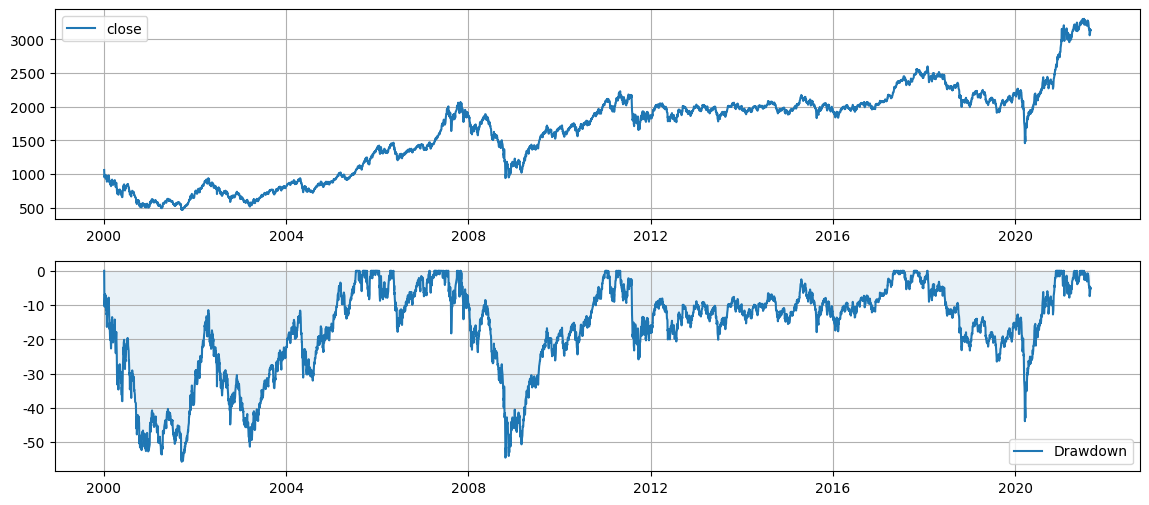

In [42]:
import matplotlib.pyplot as plt 
    
plt.rc("axes", unicode_minus=False)   # y축 음수처리

fig = plt.figure(figsize=(14, 6))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

ax1.plot(kospi.index, kospi["Close"], label="close")
ax2.plot(kospi.index, kospi["DD"] * -1, label="Drawdown")
ax2.fill_between(kospi.index, kospi["DD"] * -1, alpha=0.1) # 색상채우기

ax1.grid()
ax2.grid()

ax1.legend(loc='best')
ax2.legend(loc='best')
plt.show()